# Описание проекта

Маркетинговый анализ развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Необходимо  разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.

В вашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:

* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

Структура orders_info_short.csv:

* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

Структура costs_info_short.csv:

* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.


### Загрузка данных и подготовка их к анализу

**Изучение данных**

In [1]:
# Подключаем необходимые библиотеки

import pandas as pd       
import matplotlib.pyplot as plt 
import plotly
from datetime import datetime, timedelta
import numpy as np

In [2]:
# Читаем csv-файлы

costs = pd.read_csv('/datasets/costs_info_short.csv')
visits = pd.read_csv('/datasets/visits_info_short.csv') 
orders = pd.read_csv('/datasets/orders_info_short.csv')

print(costs.head())
print(visits.head())
print(orders.head())

           dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1
        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
        User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     

**Предобработка данных**

In [3]:
# Для удобства приведем названия колонок к нижнему регистру и "змеиному" стилю

costs.columns = costs.columns.str.lower()
costs.columns = costs.columns.str.replace(' ','_')

visits.columns = visits.columns.str.lower()
visits.columns = visits.columns.str.replace(' ','_')

orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(' ','_')

print(costs.head())
print(visits.head())
print(orders.head())

           dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1
        user_id         region   device  channel        session_start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           session_end  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
        user_id             event_dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     

In [4]:
# Проверяем типы данных

print(costs.info())
print(visits.info())
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-N

In [5]:
# Преобразуем данные о времени

costs['dt'] = pd.to_datetime(costs['dt'])

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

print(costs.info())
print(visits.info())
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+

In [6]:
# Проверяем на наличие дубликатов

for tb in [costs]:
    if tb.duplicated().sum() > 0:
        tb.duplicated().sum()
    else:
        print('В таблице "costs" дубликатов нет')
        
for tb in [visits]:
    if tb.duplicated().sum() > 0:
        tb.duplicated().sum()
    else:
        print('В таблице "visits" дубликатов нет')
        
for tb in [orders]:
    if tb.duplicated().sum() > 0:
        tb.duplicated().sum()
    else:
        print('В таблице "orders" дубликатов нет')

В таблице "costs" дубликатов нет
В таблице "visits" дубликатов нет
В таблице "orders" дубликатов нет


**Описание даных**

В наличии три датасета:

 <code>visits_info_short.csv</code> — лог сервера с данными о посещениях сайта,<br>
 <code>orders_info_short.csv</code> — выгрузка информации о покупках,<br>
 <code>costs_info_short.csv</code> — выгрузка информации о расходах на рекламу.

***Структура costs_info_short.csv***

 <code>Channel</code> — идентификатор рекламного источника,<br>
 <code>Dt</code> — дата проведения рекламной кампании,<br>
 <code>Costs</code> — расходы на эту кампанию.

***Структура visits_info_short.csv***

 <code>User Id</code> — уникальный идентификатор пользователя,<br>
 <code>Region</code> — страна пользователя,<br>
 <code>Device</code> — тип устройства пользователя,<br>
 <code>Channel</code> — идентификатор источника перехода,<br>
 <code>Session Start</code> — дата и время начала сессии,<br>
 <code>Session End</code> — дата и время окончания сессии.

***Структура orders_info_short.csv***

 <code>User Id</code> — уникальный идентификатор пользователя,<br>
 <code>Event Dt</code> — дата и время покупки,<br>
 <code>Revenue</code> — сумма заказа.

**Выводы:**

У нас есть три файла с данными о посещениях сайта, покупках и затратах на рекламу. Названия столбцов во всех таблицах были приведены к нижнему регистру и "змеиному стилю", а также данные были проверены на наличие дубликатов. Дубликатов обнаружено не было. Так же временные данные были приведены к необходимому типу.

### Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [7]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['user_payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # преобразуем столбец 'dt' в тип datetime64
    new_users['dt'] = pd.to_datetime(new_users['dt'])
    
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # преобразуем столбец 'dt' в тип datetime64[ns] в profiles
    profiles['dt'] = pd.to_datetime(profiles['dt'])

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
   
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles

In [8]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец user_payer в передаваемый dimensions список
    dimensions = ['user_payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [9]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [10]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [11]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [12]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только user_payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'user_payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('user_payer == True').droplevel('user_payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('user_payer == False').droplevel('user_payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'user_payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('user_payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('user_payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [13]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [14]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составляем пользовательские профили

In [15]:
# получим пользовательские профили

profiles = get_profiles(visits, orders, costs)

# проверяем правильность работы функций

print(profiles.head())

    user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

       month  user_payer  acquisition_cost  
0 2019-05-01        True          1.088172  
1 2019-07-01       False          1.107237  
2 2019-10-01       False          0.000000  
3 2019-08-01       False          0.988235  
4 2019-10-01       False          0.230769  


In [16]:
# определяем минимальную и максимальную даты привлечения пользователей:

print(f'''Минимальная дата привлечения пользователей: {profiles['dt'].min()}
Максимальная дата привлечения пользователей: {profiles['dt'].max()}''')

Минимальная дата привлечения пользователей: 2019-05-01 00:00:00
Максимальная дата привлечения пользователей: 2019-10-27 00:00:00


**Вывод**

Судя по полученным результатам мы имеем в нашем рапоряжении данные о пользователях, которые были привлечены в период с 01.05.2019 по 27.10.2019

#### Распределение пользователей по странам

In [17]:
# рассмотрим, из каких стран приходят пользователи
profiles['region'].unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

In [18]:
# напишем функцию для расчета количества пользователей по критерию а также долю платящих

def profiles_research(df, dimension, index_name):
    result = (
        df
        .groupby(dimension) # группируем по критерию
        .agg({
                'user_id': 'nunique', # считаем уникальных пользователей
                'user_payer': 'mean' # и долю (среднее) платящих
        }) 
    )
    # вычисляем проценты
    result['user_payer'] = result['user_payer'] * 100 
    # для удобства переименовываем названия столбцов и индексов
    result = result.rename({'user_id': 'Кол-во пользователей', 'user_payer': '% платящих'}, axis=1)
    result.index.name = index_name 
    result = result.sort_values(by='% платящих', ascending=False) # сортируем по убыванию доли платящих
    return result

# группируем пользователей по региону, находим количество пользователей и долю платящих
profiles_research(profiles, 'region', 'Регион')


,Кол-во пользователей,% платящих
Регион,,
United States,100002,6.901862
Germany,14981,4.111875
UK,17575,3.982930
France,17450,3.799427


**Вывод**

Пользователи представлены из четырех стран: США, Германии, Франции и Великобритании. Большинство пользователей, включая платящих, происходит из США (100,002 человека, из которых 6.9% платящие). Наименьшее количество пользователей из Германии, а наименьший процент платящих — из Франции.

#### Анализ устройств клиентов и предпочтений платящих пользователей

In [19]:
# рассмотрим, какие устройства предпочитают пользователи
profiles['device'].unique()

array(['Mac', 'iPhone', 'PC', 'Android'], dtype=object)

In [20]:
# группируем пользователей по устройствам, ищем количество всех пользователей и долю платящих
profiles_research(profiles, 'device', 'Устройство')

,Кол-во пользователей,% платящих
Устройство,,
Mac,30042,6.364423
iPhone,54479,6.207897
Android,35032,5.851793
PC,30455,5.046790


**Вывод**

Пользователи заходят в приложение с устройств Mac, iPhone, Android и PC. Наибольшее количество пользователей заходит с iPhone (54,479), а наибольший процент платящих пользователей использует Mac (6.4%).

#### Анализ рекламных источников

In [21]:
# рассмотрим, источники имеющиеся в профилях пользователей
profiles['channel'].unique()

array(['FaceBoom', 'organic', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [22]:
# группируем пользователей по каналам привлечения, найдем количество всех пользователей и долю платящих
profiles_research(profiles, 'channel', 'Канал привлечения')

,Кол-во пользователей,% платящих
Канал привлечения,,
FaceBoom,29144,12.204914
AdNonSense,3880,11.340206
lambdaMediaAds,2149,10.469986
TipTop,19561,9.600736
RocketSuperAds,4448,7.913669
WahooNetBanner,8553,5.296387
YRabbit,4312,3.826531
MediaTornado,4364,3.574702
LeapBob,8553,3.063253


**Вывод**

Наибольшее количество пользователей приходит через "органический" трафик (56 439 человек), но они платят меньше всего (всего 2% пользователей). Наибольшее количество платящих пользователей приходит с канала "FaceBoom" (12.2%), так же данный источник является вторым по привлечению пользователей в количественном трафике (29 144 человек). Третьим источником по количественному трафику является "TipTop", однако по % платящих пользователей он лишь на 4м месте. 

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Расчет общей суммы расходов на маркетинг

In [23]:
# посчитаем общую сумму расходов на маркетинг
round(costs['costs'].sum())

105497

#### Анализ распределения трат по рекламммным источникам

In [24]:
def calculate_channel_costs(data, group_column, label):
    # Группируем данные по столбцу и суммируем расходы
    result = data.groupby(group_column)['costs'].sum().reset_index()

    result.columns = [label, 'Суммарные расходы']

    total_costs = result['Суммарные расходы'].sum()

    result['Процент расходов'] = (result['Суммарные расходы'] / total_costs) * 100

    return result

result = calculate_channel_costs(costs, 'channel', 'Каналы')
print(result)

               Каналы  Суммарные расходы  Процент расходов
0          AdNonSense            3911.25          3.707441
1            FaceBoom           32445.60         30.754910
2             LeapBob            1797.60          1.703930
3        MediaTornado             954.48          0.904744
4  OppleCreativeMedia            2151.25          2.039152
5      RocketSuperAds            1833.00          1.737485
6              TipTop           54751.30         51.898295
7      WahooNetBanner            5151.00          4.882589
8             YRabbit             944.22          0.895018
9      lambdaMediaAds            1557.60          1.476436


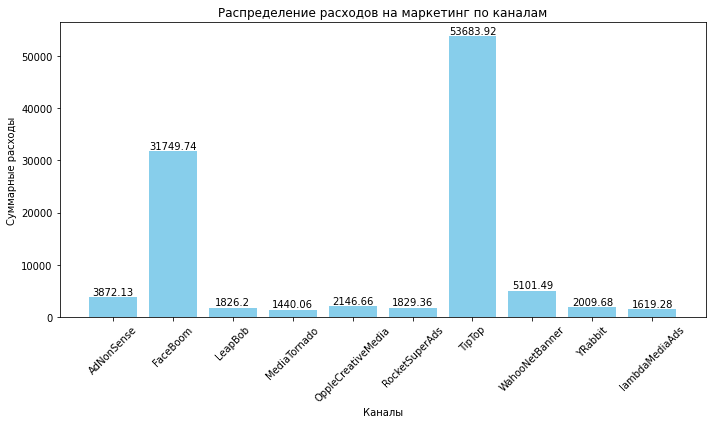

In [25]:
# сглаживаем данные о расходах, применяя скользящее среднее с окном равным 5
costs['costs_filtered'] = costs['costs'].rolling(window=5).mean() 

def plot_channel_costs(data, group_column, label):
    # Группируем данные по столбцу и суммируем расходы
    result = data.groupby(group_column)['costs_filtered'].sum().reset_index()

    result.columns = [label, 'Суммарные расходы']

    # Строим гистограмму для наглядности
    plt.figure(figsize=(10, 6))
    bars = plt.bar(result[label], result['Суммарные расходы'], color='skyblue')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

    plt.title('Распределение расходов на маркетинг по каналам')
    plt.xlabel(label)
    plt.ylabel('Суммарные расходы')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Отображение гистограммы
    plt.show()

# Пример использования функции
plot_channel_costs(costs, 'channel', 'Каналы')

**Вывод**

Было вычеслено, что общие траты на маркетинг составили 105 497. 

Самыми затратными по расходам на рекламу были сервисы "TipTop"(53 683,92) и "FaceBoom"(31 749,74). На остальные сервисы было потрачено гораздо меньше от 1 440 до 5 101.

#### Анализ динамики изменения расходов по рекламным источникам в разрезе недель и месяцев

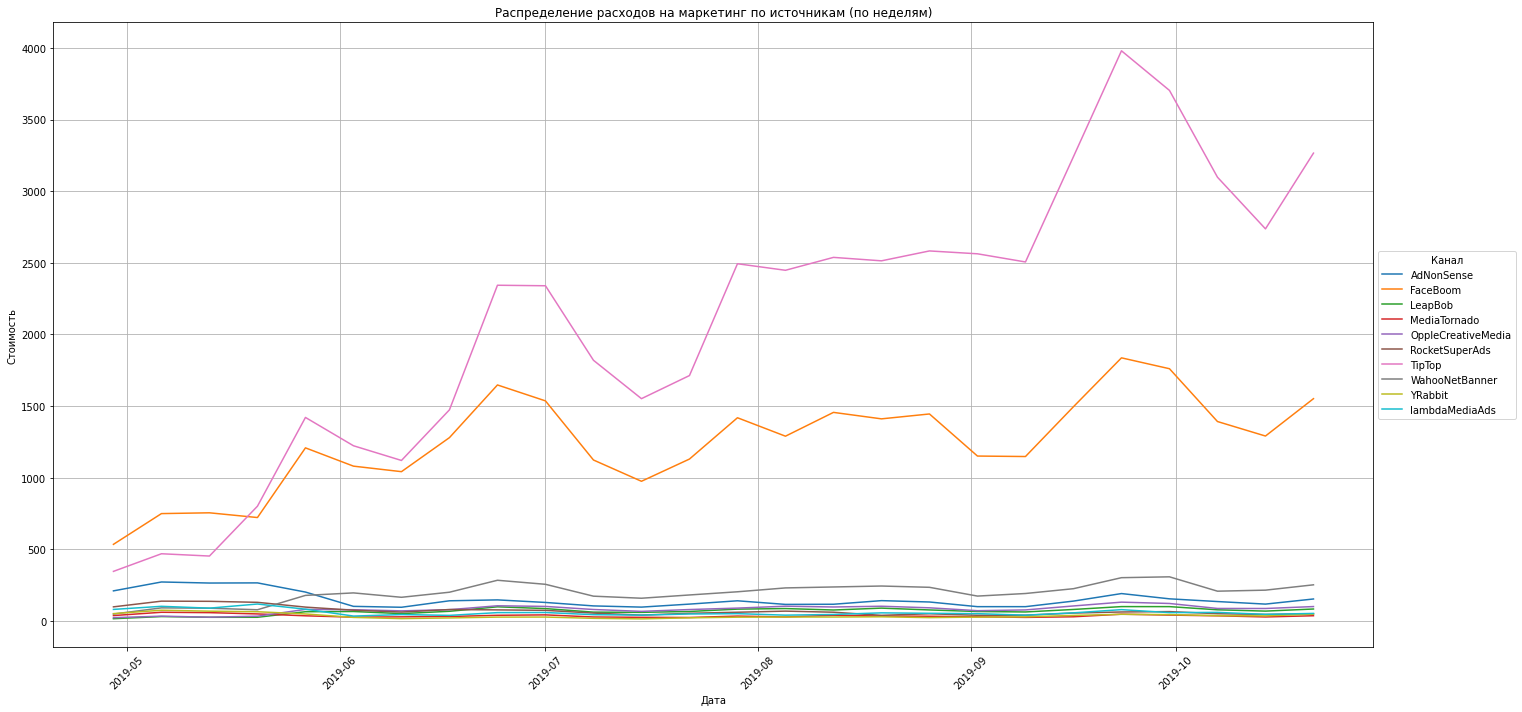

In [26]:
# строим графики для каждого источника расходов
costs['week'] = costs['dt'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_costs = costs.groupby(['week', 'channel'])['costs'].sum().reset_index()

# Строим график
plt.figure(figsize=(25, 10))
for channel in weekly_costs['channel'].unique():
    channel_data = weekly_costs[weekly_costs['channel'] == channel]
    plt.plot(channel_data['week'], channel_data['costs'], label=channel)

plt.title('Распределение расходов на маркетинг по источникам (по неделям)')
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.legend(title='Канал', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 0.85, 1])  
plt.show()

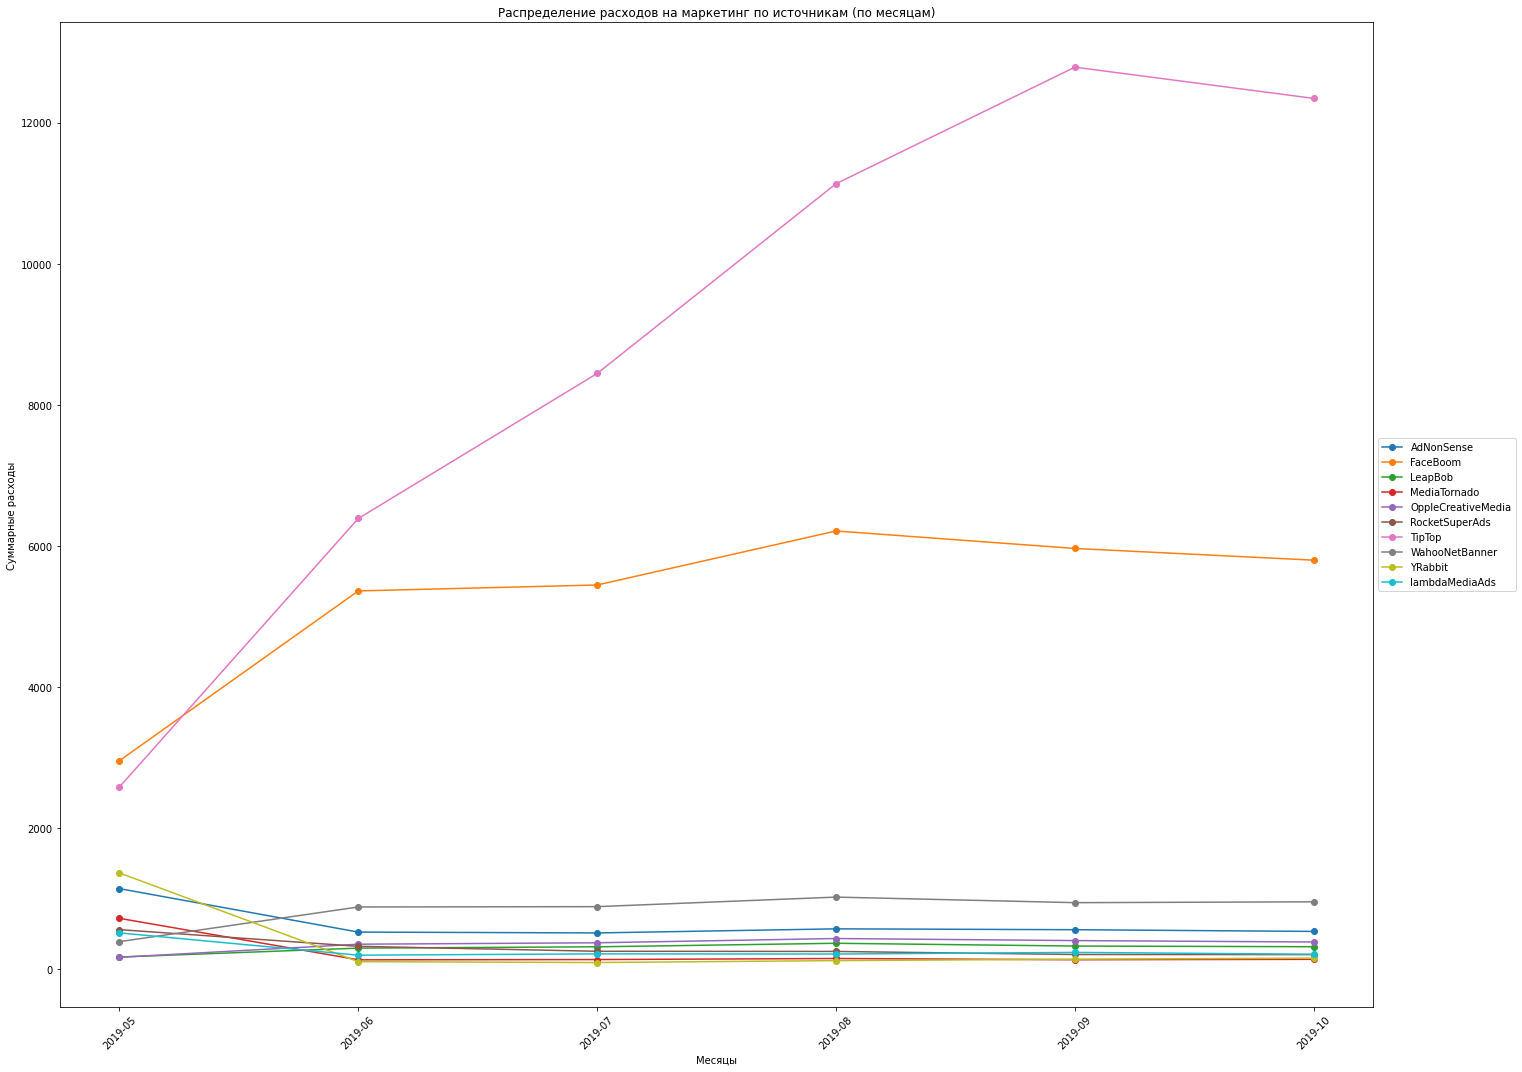

In [27]:
def plot_monthly_channel_costs(data, date_column, channel_column, cost_column):
    # Преобразуем столбец с датами в формат datetime
    data[date_column] = pd.to_datetime(data[date_column])

    # Группируем данные по месяцам и каналам, суммируем расходы
    data['month'] = data[date_column].dt.to_period('M')
    monthly_channel_costs = data.groupby(['month', channel_column])[cost_column].sum().reset_index()

    # Преобразуем периоды в строки для отображения на графике
    monthly_channel_costs['month'] = monthly_channel_costs['month'].astype(str)

    # Строим линейный график
    plt.figure(figsize=(25, 15))

    for channel in monthly_channel_costs[channel_column].unique():
        channel_data = monthly_channel_costs[monthly_channel_costs[channel_column] == channel]
        plt.plot(channel_data['month'], channel_data[cost_column], marker='o', label=channel)

    plt.title('Распределение расходов на маркетинг по источникам (по месяцам)')
    plt.xlabel('Месяцы')
    plt.ylabel('Суммарные расходы')
    plt.xticks(rotation=45)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Оставляем место для легенды справа

    # Отображение графика
    plt.show()

# Пример использования функции
plot_monthly_channel_costs(costs, 'dt', 'channel', 'costs_filtered')

**Вывод**

Анализ графиков показывает значительный рост расходов на маркетинг, особенно в каналах "TipTop" и "FaceBoom", что указывает на их приоритетность. Остальные каналы демонстрируют стабильные, но низкие расходы, с заметными пиками активности, вероятно связанными с сезонными кампаниями.

#### Анализ стоимости привлечения пользователей по источникам

In [28]:
# считаем средний САС по каналам привлечения
profiles.groupby('channel') \
    .agg({
        'acquisition_cost': 'mean'
        }) \
    .sort_values('acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [29]:
print(f' Средний CAC на одного пользователя для всего проекта = {round(profiles["acquisition_cost"].mean(), 2)}')

 Средний CAC на одного пользователя для всего проекта = 0.7


**Вывод**

В среднем, самым дорогим источником привлечения пользователей стал TipTop (2.8), тогда как LeapBob (0.2) оказался самым экономичным. Однако так же надо учитывать и "Органические" привлечения которые для проекта бесплатны.

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Общая окупаемость инвестиций в рекламу. Графики показателей LTV и ROI, а также динамика изменений LTV, CAC и ROI.

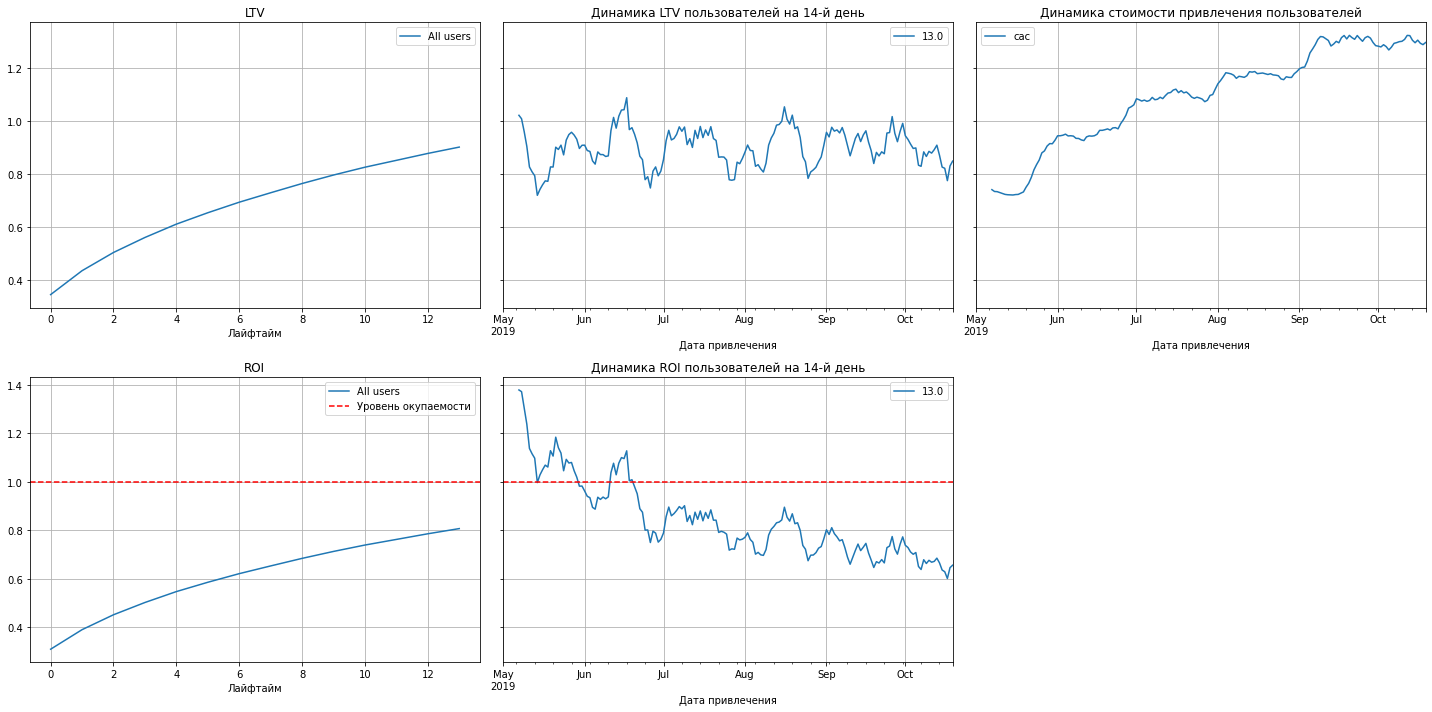

In [30]:
# дата наблюдения - 01.11.2019
observation_date = datetime(2019, 11, 1).date()

#исключим "органических" пользователей, т.к. на их привлечения бюджет затрачен не был
profiles_ads = profiles.query('channel != "organic"')

# горизонт анализа данных - 14 дней
horizon_days = 14

ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(profiles_ads, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days, window=7)

**Выводы**

Рекламные затраты постепенно растут, начиная с середины мая 2019 года.

Реклама не приносит окупаемости. В начале и до середины июня наблюдаются периоды эффективного использования рекламных инструментов, однако с середины июня ROI начинает снижаться.

#### Анализ и визуализация конверсии и удержания пользователей

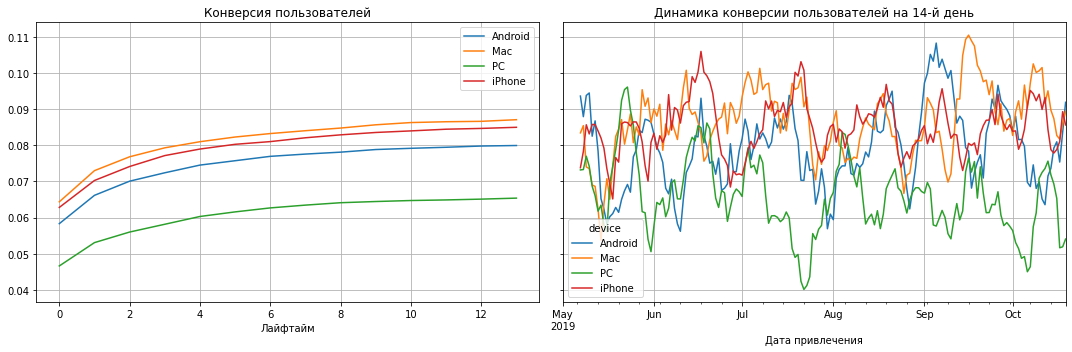

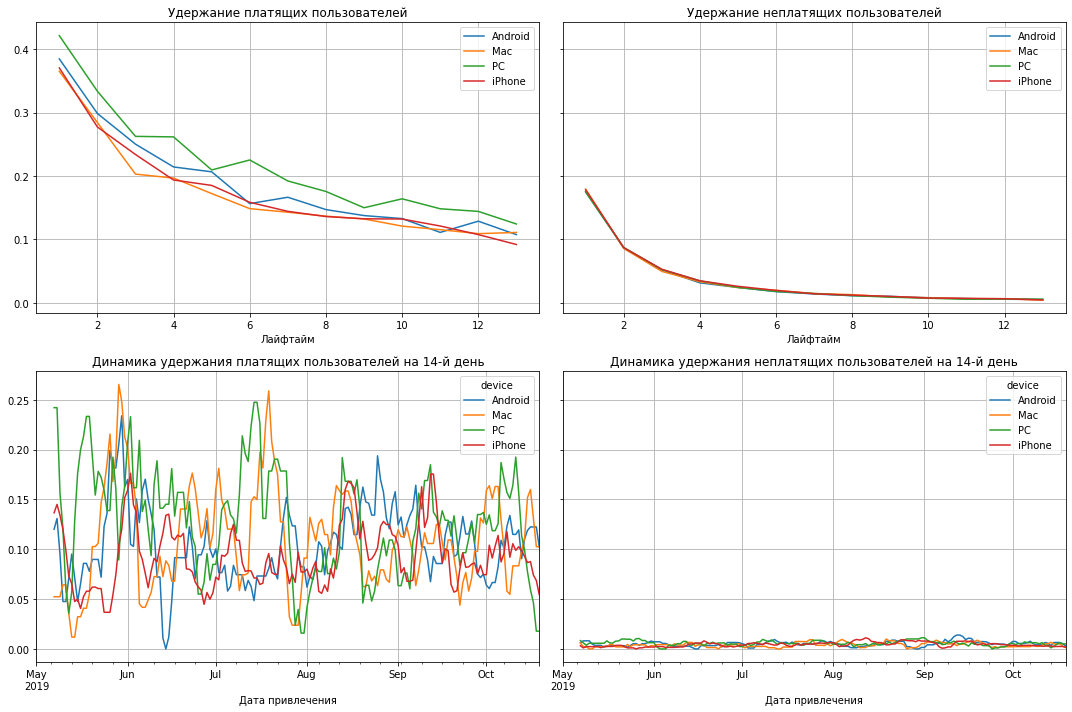

In [31]:
# конверсия по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_ads, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

# удержание по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_ads, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Выводы**

Наименьшая конверсия наблюдается среди пользователей РС, однако эти пользователи наиболее лояльны к продукты, что видно на графике удержания.
Возможно в середине июля и в начале октября были неудачные рекламные компании, которые принесли маленькую конверсию среди пользователей РС.
Удержание неплатящих пользователей для всех устройств примерно одинаковое и плохое.

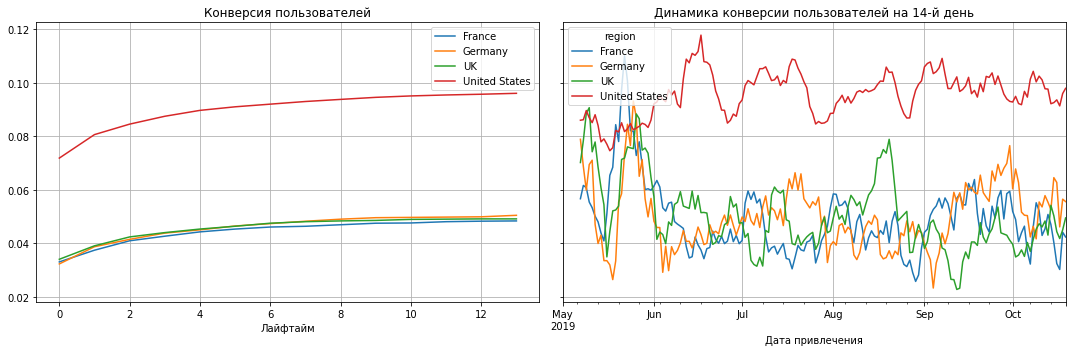

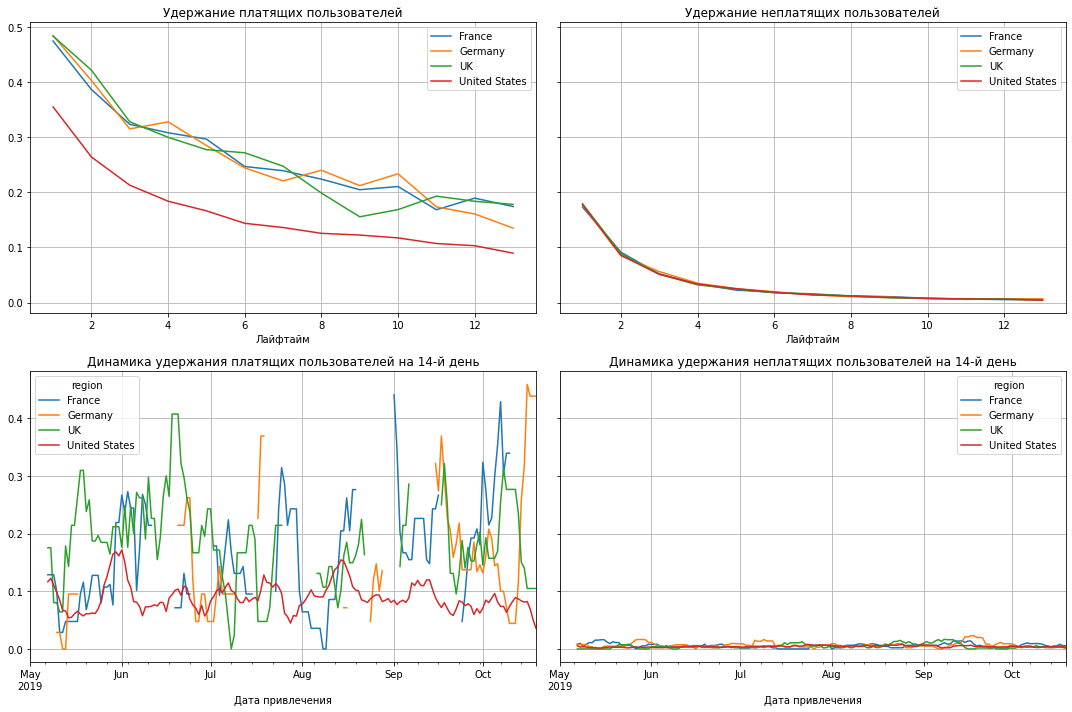

In [32]:
# конверсия по регионам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_ads, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

# удержание по регионам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_ads, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Выводы**

Наибольшая конверсия наблюдается среди пользователей из США, однако они менее лояльны к продукту по сравнению с пользователями из других стран, что видно на графике удержания. В остальных странах уровень лояльности к продукту примерно одинаковый.

В конце мая в Германии, Франции и Великобритании была успешная рекламная кампания, что привело к значительному росту уровня конверсии, однако этот всплеск продлился недолго.

Уровень удержания неплатящих пользователей во всех странах примерно одинаково низкий.

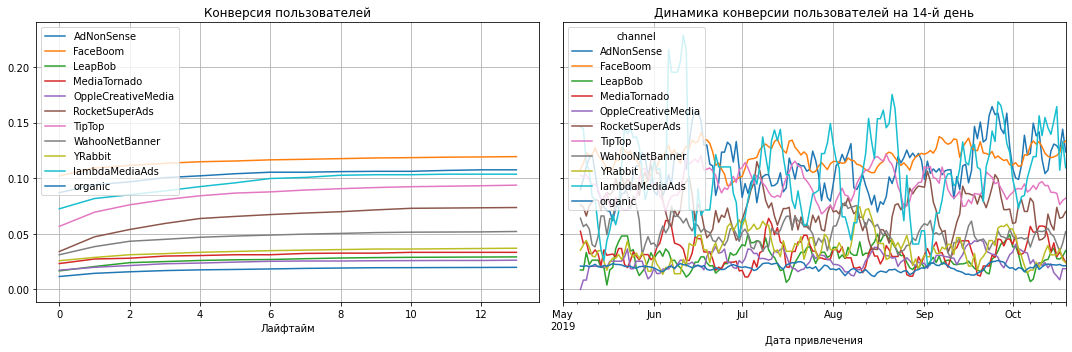

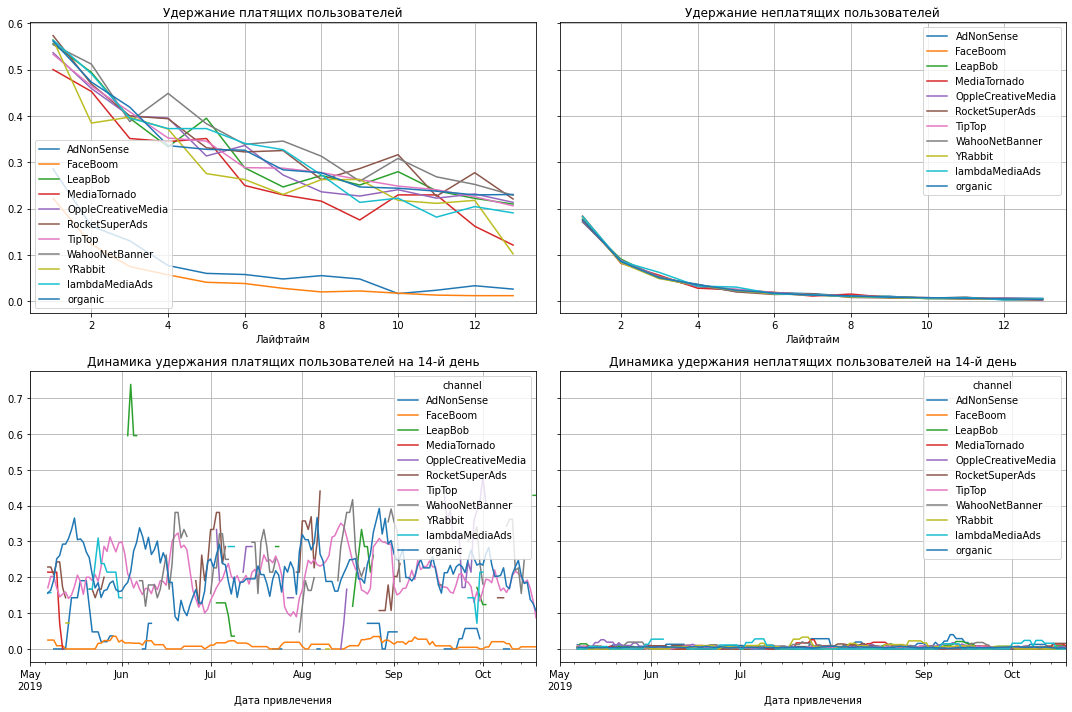

In [33]:
# конверсия по каналам
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

# удержание по каналам привлечения
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Выводы**

Наибольшая конверсия наблюдается среди пользователей, привлеченных через каналы FaceBoom и AdNonSense, однако эти пользователи менее лояльны к продукту по сравнению с остальными, что видно на графике удержания. Остальные пользователи демонстрируют примерно одинаковую лояльность к продукту.

График удержания платящих пользователей показывает, что канал FaceBoom является наименее перспективным и создает дополнительные трудности.

Пользователи, привлеченные не через рекламу, также плохо конвертируются, что может свидетельствовать о недостаточном удовлетворении их потребностей продуктом.

#### Общая окупаемость инвестиций в рекламу по устройствам. Графики показателей LTV и ROI, а также динамика изменений LTV, CAC и ROI.

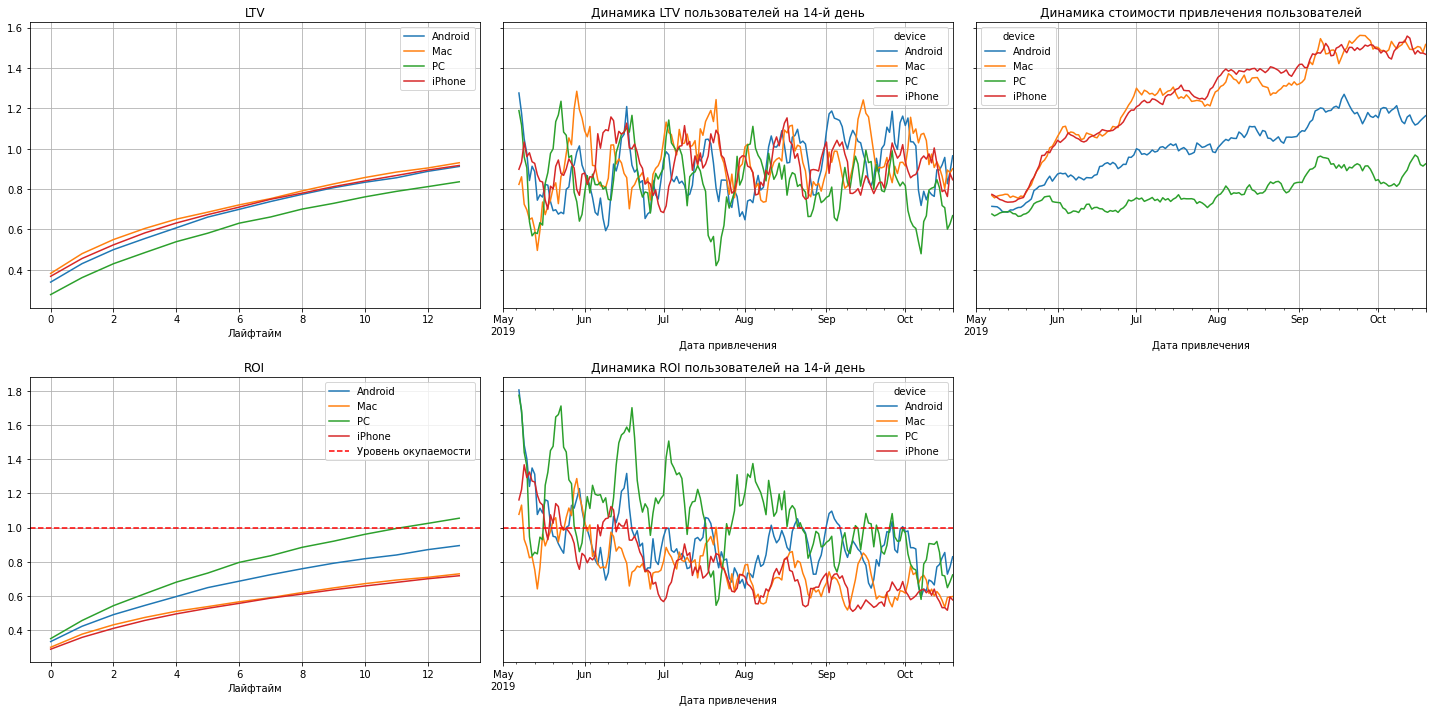

In [34]:
# введем категорию отбора - рекламные каналы
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(profiles_ads, orders, observation_date, horizon_days, dimensions)


plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days, window=7)

**Выводы**

LTV для всех устройств остается примерно на одном уровне, даже при анализе динамики на 14-й день. Пользователи iPhone и Mac обходятся компании дороже остальных, тогда как привлечение пользователей с ПК является самым дешевым.

США являются убыточными, так как высокие затраты на рекламу не оправдывают прироста пользователей.

Тренд ROI превышает уровень окупаемости только для пользователей ПК, однако и они перестали окупаться с конца августа на 14-й день. С конца августа компания получает только убытки.

#### Общая окупаемость инвестиций в рекламу по странам. Графики показателей LTV и ROI, а также динамика изменений LTV, CAC и ROI.

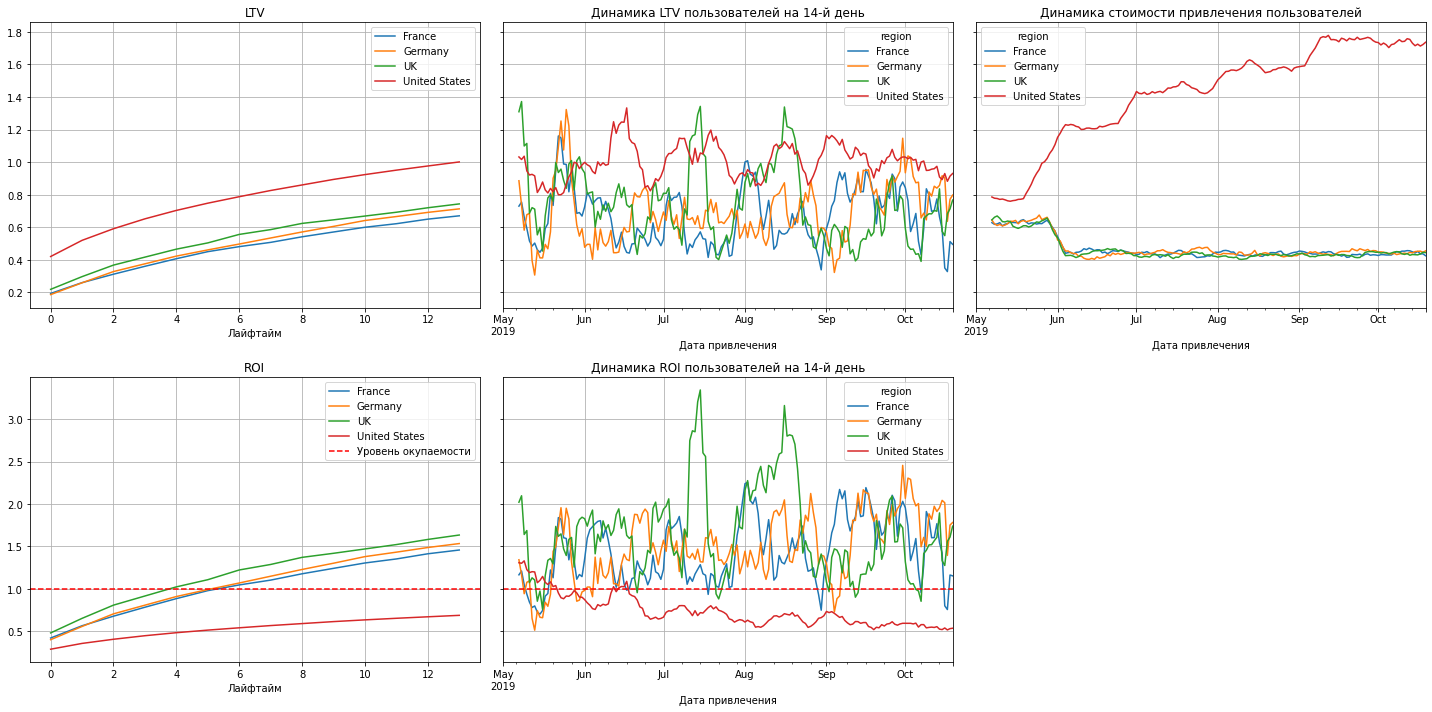

In [35]:
# категория отбора - страны
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(profiles_ads, orders, observation_date, horizon_days, dimensions)

plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days, window=7)

**Выводы**

Расходы на рекламу в США остаются постоянно высокими и продолжают расти, однако, несмотря на значительные вложения, США остаются убыточными, так как большие затраты на рекламу не оправдывают прироста пользователей.

Пользователи из США обходятся значительно дороже, чем из других стран, по затратам.

Тренд ROI для США остается ниже уровня окупаемости.

#### Общая окупаемость инвестиций в рекламу по каналам. Графики показателей LTV и ROI, а также динамика изменений LTV, CAC и ROI.

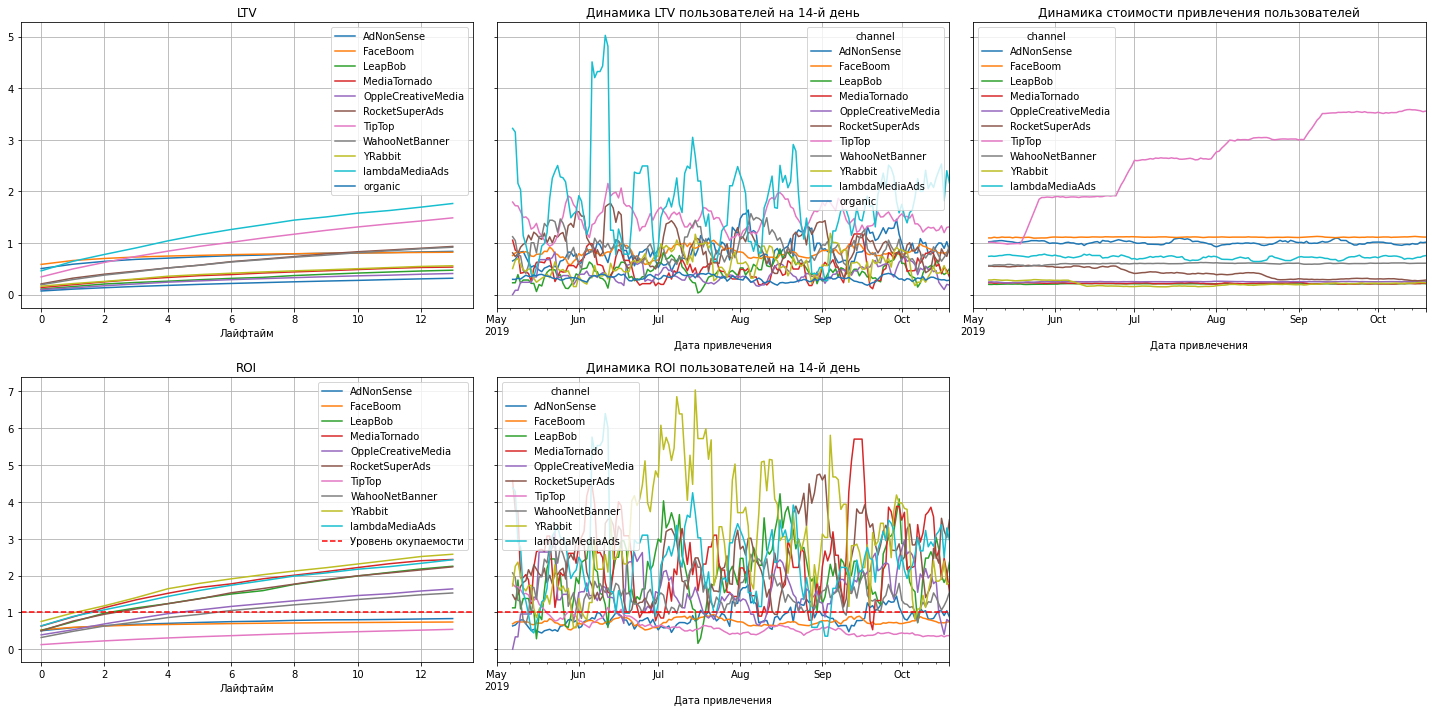

In [36]:
# категория отбора - рекламные каналы
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(profiles, orders, observation_date, horizon_days, dimensions)

plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days, window=7)

**Выводы**

LTV на 14-й день нестабилен, однако наблюдается цикличность и определенные закономерности.

Затраты на канал TipTop постоянно растут, но он не достигает уровня окупаемости. Чем больше компания инвестирует в этот канал, тем больше теряет денег.

Каналом, заслуживающим внимания для инвестиций, является YRabbit, который не только окупается, но и значительно превосходит другие каналы.

Топ-3 каналов по окупаемости: 
- YRabbit 
- MediaTornado
- lambdaMediaAds.

Каналы, которые не окупаются: 
- TipTop
- FaceBoom
- AdNonSense

**Общие выводы**

Реклама с начала до середины июня была окупаемой и приносила результаты, однако с середины июня ROI начал снижаться. Кроме того, с мая наблюдался рост расходов на рекламу.

Самыми "дорогими" пользователями являются владельцы iPhone, при этом пользователи Mac и iPhone демонстрируют самые низкие показатели окупаемости. Анализируя окупаемость, так же можно заметить, что Соединенные Штаты, несмотря на высокие затраты и самый высокий LTV, остаются убыточными, так как реклама не окупает себя.

По показателю конверсии FaceBoom занимает первое место, но не обеспечивает окупаемости, как и AdNonSense и TipTop, которые также не окупаются по динамике ROI.

Проблемы с окупаемостью вероятно вызваны неправильным распределением ресурсов и большим количеством каналов привлечения, что затрудняет достижение прибыльности для большинства из них.

**ВЫВОДЫ:**

США занимают лидирующую позицию по доле привлеченных пользователей — 6.9%, что свидетельствует о значительном потенциале американского рынка.

Платящие пользователи чаще используют смартфоны iPhone (38.1%) и компьютеры Mac (21.5%). Эти пользователи также демонстрируют более высокую склонность к покупкам, что может указывать на специфическую аудиторию, привлекаемую рекламой.

Каналы привлечения, такие как FaceBoom и TipTop, играют важную роль в привлечении платящих пользователей, хотя и требуют значительных инвестиций. На TipTop было выделено 51.9% бюджета, а на FaceBoom — 30.8%. Эффективность этих каналов критически важна для общей окупаемости. Например, FaceBoom требует 1.1 условной единицы на привлечение пользователя, из которых 12.2% становятся платящими. У TipTop стоимость привлечения составляет 2.8 условные единицы, с 9.6% платящих пользователей. Это указывает на необходимость пересмотра рекламной политики.

Расходы на привлечение пользователей значительно возросли, однако ROI снижается, что свидетельствует о проблемах с окупаемостью и необходимости пересмотра стратегии вложений.

Несмотря на успехи некоторых каналов, общая окупаемость остается низкой, особенно в последние месяцы. Это может потребовать пересмотра бюджетных распределений и стратегии привлечения пользователей.

Динамика удержания платящих пользователей положительна, однако неплатящие пользователи демонстрируют низкий уровень удержания, что может указывать на недостаточную привлекательность сервиса для этой группы.

Успешные каналы с низкими затратами и стоимостью привлечения, такие как lambdaMediaAds и AdNonSense, подчеркивают важность выбора эффективных источников для повышения окупаемости.

В целом, реклама не окупается. Некоторые каналы, такие как lambdaMediaAds и AdNonSense, показали успешные результаты, но они не были приоритетными, и вложения в них не изменили ситуацию.

Пользователи из Франции и пользователи ПК демонстрируют низкую конверсию, что может указывать на трудности с использованием продукта.

**РЕКОМЕНДАЦИИ**

- Нужно детально изучить профили уже привлеченных и удержанных пользователей. Это поможет понять, какую целевую аудиторию привлекает текущая рекламная стратегия, и расширить ее на другие группы пользователей, как платящих, так и неплатящих.
- Требуется пересмотреть эффективность каждого рекламного канала и источника. На основании текущих результатов следует сократить бюджет на TipTop и рассмотреть другие каналы, в которые с мая по октябрь инвестировали мало, но они показывали стабильный уровень окупаемости.
- Так же следует сосредоточиться на моментах с наибольшим оттоком клиентов, как платящих, так и неплатящих. Провести анализ причин и доработать стратегию, чтобы избежать подобных ситуаций в будущем.
- Необходимо обратить внимание так же и на органических клиентов. Продукт привлекает значительное количество органических клиентов — около 40% от всех, но платящих среди них всего 2%. Стоит рассмотреть способы перевода этих пользователей в платящий сегмент.

Так же помимо всего прочего, необходимо обратить внимание на работу команды и планирование бюджета. 